In [126]:
#import the libraries
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#import standard scaler
from sklearn.preprocessing import StandardScaler

#import the PCA function
from sklearn.decomposition import PCA

In [75]:
#create the working directory
os.chdir('/Users/rossbrancati/Desktop/PFP_Project/EMG/PCA_matrices')
data_directory = os.path.join(os.getcwd(), 'all_groups_labeled')
directory = sorted(os.listdir(data_directory))
directory.remove('.DS_Store')

In [102]:
#loop over every file in the directory
#for file_idx,file_name in enumerate(directory):
    
#set variable as file path for file and labels
file_path = os.path.join(data_directory,file_name)
labels_path = os.path.join(data_directory,'labels.txt')

#load the file
raw_file = pd.read_csv(file_path,sep='\t')
#load the labels
labels = pd.read_csv(labels_path,sep='\t')

#create an array of features for labelling columns
features = np.array(['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 
                     't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 
                     't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30', 
                     't31', 't32', 't33', 't34', 't35', 't36', 't37', 't38', 't39', 't40', 
                     't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50', 
                     't51', 't52', 't53', 't54', 't55', 't56', 't57', 't58', 't59', 't60', 
                     't61', 't62', 't63', 't64', 't65', 't66', 't67', 't68', 't69', 't70', 
                     't71', 't72', 't73', 't74', 't75', 't76', 't77', 't78', 't79', 't80', 
                     't81', 't82', 't83', 't84', 't85', 't86', 't87', 't88', 't89', 't90', 
                     't91', 't92', 't93', 't94', 't95', 't96', 't97', 't98', 't99', 't100', 
                     't101', 'labels'])

#convert raw_file to a pandas data frame
current_muscle = pd.DataFrame(raw_file)

#concatenate labels and current_mucscle
final_muscle_data = np.concatenate([current_muscle,labels], axis=1)
muscle_dataset = pd.DataFrame(final_muscle_data)

#assign the feature array to the column titles of the muscle_dataset
muscle_dataset.columns = features

#check the first 5 rows of the muscle_dataset
#muscle_dataset.head()

#switch the labels from 0, 1, and 2 to healthy, recovered, and injured
muscle_dataset['labels'].replace(0, 'healthy',inplace=True)
muscle_dataset['labels'].replace(1, 'recovered',inplace=True)
muscle_dataset['labels'].replace(2, 'injured',inplace=True)


#standardizing the data
#it is necessary in PCA to standardize the data around the mean because the scale of data
#could be very different between signals.
####Although I am not sure if it is necessary with this EMG data because it is already 
####normalized to largest EMG signal during the particular stride
x = current_muscle.loc[:,features].values
x = StandardScaler().fit_transform(x)

#convert normalized features into tabular format with the help of dataframe
#NOT SURE IF THIS IS NEEDED OR NOT
#feat_cols = ['feature'+str(i) for i in range(current_muscle.shape[1])]
#muscle_dataset_new_col_names = pd.DataFrame(current_muscle,columns=feat_cols)
    



In [120]:
#Principal Component Analysis

#build the PCA model
pca_muscle = PCA(n_components=2)
principalComponents_muscle = pca_muscle.fit_transform(current_muscle)

#create a dataframe with the principal component values for all samples
principal_muscle_DF = pd.DataFrame(data = principalComponents_muscle, 
                                   columns = ['principal component 1', 'principal component 2'])
principal_muscle_DF.tail()

print('Explained variation per principal component: {}'.format(pca_muscle.explained_variance_ratio_))


<Figure size 432x288 with 0 Axes>

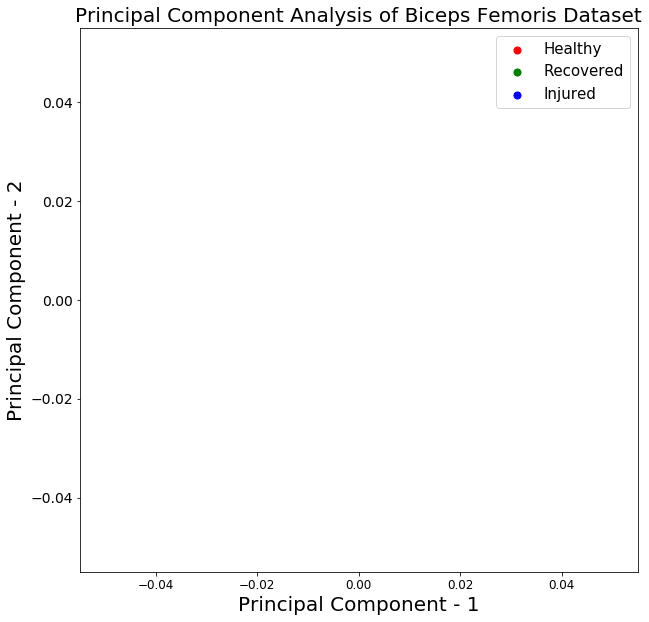

In [131]:
#Visualizing the PCA
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Biceps Femoris Dataset",fontsize=20)
targets = ['Healthy', 'Recovered', 'Injured']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = muscle_dataset['labels'] == target
    plt.scatter(principal_muscle_DF.loc[indicesToKeep, 'principal component 1']
               , principal_muscle_DF.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})